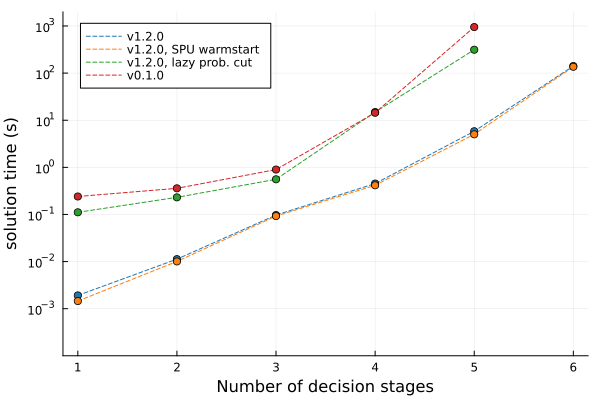

In [25]:
using DelimitedFiles, Plots, LaTeXStrings, Plots.PlotMeasures, Statistics
N_sample = 50
N_max = 7
t1 = zeros(N_max-1, N_sample)
t2 = zeros(N_max-1, N_sample)
t_spu = zeros(N_max-1, N_sample)
obj = zeros(N_max-1, N_sample)
obj_spu = zeros(N_max-1, N_sample)
n = 0
for i in 1:N_sample
    try
        result = readdlm((@__DIR__)*"/results/pigfarm_"*string(i)*".csv", ',')
        for j in 1:N_max-1
            t1[j,i] = result[j,1]
            t2[j,i] = result[j,2]
            t_spu[j,i] = result[j,3]
            obj[j,i] = result[j,4]
            obj_spu[j,i] = result[j,5]
        end
        n += 1
    catch e
        println("Missing file "*(@__DIR__)*"/results/pigfarm_"*string(i)*".csv")
    end
end

N = collect(1:N_max-1)
plot(N, mean(t1,dims=2), linestyle=:dash, xticks=N, ylim=(1E-4,2E3), yticks=[10.0^k for k in -3:3], xlabel="Number of decision stages", ylabel="solution time (s)", yaxis=:log, label="v1.2.0", color=palette(:tab10)[1], legend=:topleft)
plot!(N, mean(t2,dims=2), linestyle=:dash, label="v1.2.0, SPU warmstart", color=palette(:tab10)[2])
scatter!(N, mean(t1,dims=2), label=false, color=palette(:tab10)[1])
scatter!(N, mean(t2,dims=2), label=false, color=palette(:tab10)[2])
# plot!(N, sum(t_spu,dims=2)/N_sample, label="SPU", color=palette(:tab10)[3])

N_sample = 50
N_max = 6
t = zeros(N_max-1, N_sample)
n = 0
for i in 1:N_sample
    try
        result = readdlm((@__DIR__)*"/results/pigfarm_lazy_"*string(i)*".csv", ',')
        for j in 1:N_max-1
            t[j,i] = result[j,1]
        end
        n += 1
    catch e
        println("Missing file "*(@__DIR__)*"/results/pigfarm_lazy_"*string(i)*".csv")
    end
end
N = collect(1:N_max-1)
plot!(N, mean(t,dims=2), linestyle=:dash, label="v1.2.0, lazy prob. cut", color=palette(:tab10)[3])
scatter!(N, mean(t,dims=2), label=false, color=palette(:tab10)[3])

N_sample = 50
N_max = 6
t = zeros(N_max-1, N_sample)
n = 0
for i in 1:N_sample
    try
        result = readdlm((@__DIR__)*"/../../DecProg_0_1_0/experiments/results/pigfarm_"*string(i)*".csv", ',')
        for j in 1:N_max-1
            t[j,i] = result[j,1]
        end
        n += 1
    catch e
        println("Missing file "*(@__DIR__)*"/../../DecProg_0_1_0/experiments/results/pigfarm_"*string(i)*".csv")
    end
end
N = collect(1:N_max-1)
plot!(N, mean(t,dims=2), linestyle=:dash, label="v0.1.0", color=palette(:tab10)[4])
scatter!(N, mean(t,dims=2), label=false, color=palette(:tab10)[4])


# Plots.pdf("pigfarm")

In [26]:
using DelimitedFiles
result_arr = zeros(50,3)
for j in 1:50
    result = readdlm((@__DIR__)*"/results/pigfarm_"*string(j)*".csv", ',')
    result_arr[j,1] = result[6,6]
    result_arr[j,2] = result[6,5]
    result_arr[j,3] = result[6,4]
end
gap = sort(result_arr[:,1]./result_arr[:,3])
println("v1.1: 10%: $((gap[5]+gap[6])/2), median: $((gap[25]+gap[26])/2), 90%: $((gap[45]+gap[46])/2), mean: $(sum(gap)/length(gap))")
result = readdlm((@__DIR__)*"/../../DecProg_0_1_0/experiments/results/pigfarm_linrel_6stages.csv", ',')
gap = sort(result[:,1]./result[:,2])
println("v0.1: 10%: $((gap[5]+gap[6])/2), median: $((gap[25]+gap[26])/2), 90%: $((gap[45]+gap[46])/2), mean: $(sum(gap)/length(gap))")

v1.1: 10%: 0.9999999999271834, median: 1.2054469040623483, 90%: 1.8114860175708491, mean: 1.337828535835178
v0.1: 10%: 15.367910182369076, median: 26.363550580379975, 90%: 31.14911206084313, mean: 24.957078151542177


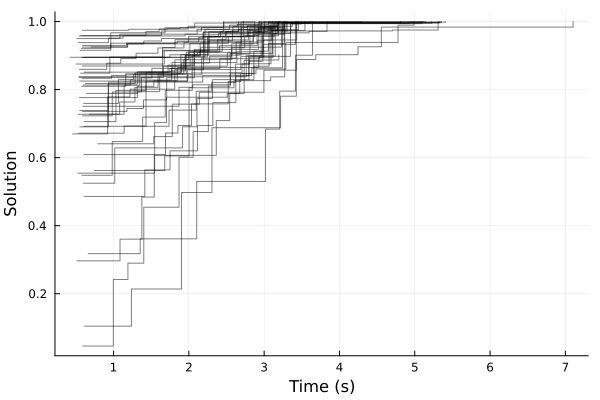

In [27]:
using DelimitedFiles, Plots
N_sample = 50
result_arr = zeros(N_sample,3)
for j in 1:N_sample
    result = readdlm((@__DIR__)*"/results/pigfarm_"*string(j)*".csv", ',')
    result_arr[j,1] = result[6,6]
    result_arr[j,2] = result[6,5]
    result_arr[j,3] = result[6,4]
end

sols = []
t_arr = []
plt = plot(xlabel="Time (s)", ylabel="Solution")
for i in 1:N_sample
    try
        result_spu = readdlm((@__DIR__)*"/results/pigfarm_spu_6stages_$i.csv", ',')
        sol_spu = result_spu[:,1]./result_arr[i,3]
        t_spu = result_spu[:,2]/1000
        push!(sols, sol_spu[end])
        push!(t_arr, t_spu[end])
        plot!(t_spu, sol_spu, seriestype = :steppost, color=:black, alpha=0.5, label=false)
    catch e
        println("Missing file "*(@__DIR__)*"/results/pigfarm_spu_6stages_$i.csv")
    end
end
plt
# Plots.pdf("spu")

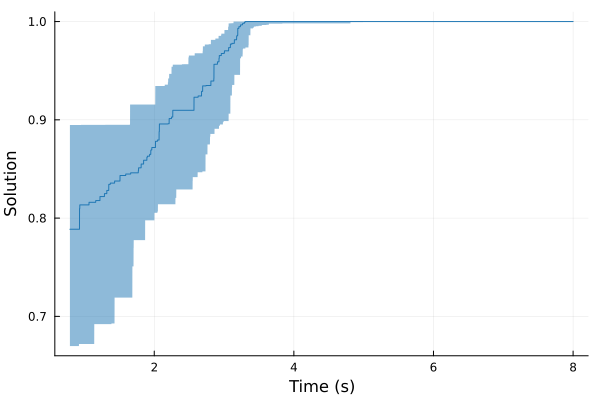

In [29]:
using DelimitedFiles, Plots, Statistics
N_sample = 50
result_arr = zeros(N_sample,3)
for j in 1:N_sample
    result = readdlm((@__DIR__)*"/results/pigfarm_"*string(j)*".csv", ',')
    result_arr[j,1] = result[6,6]
    result_arr[j,2] = result[6,5]
    result_arr[j,3] = result[6,4]
end

sols = []
t_arr = []
plt = plot(xlabel="Time (s)", ylabel="Solution")
for i in 1:N_sample
    try
        result_spu = readdlm((@__DIR__)*"/results/pigfarm_spu_6stages_$i.csv", ',')
        sol_spu = result_spu[:,1]./result_arr[i,3]
        t_spu = result_spu[:,2]/1000
        push!(sols, sol_spu)
        push!(t_arr, t_spu)
    catch e
        println("Missing file "*(@__DIR__)*"/results/pigfarm_spu_6stages_$i.csv")
    end
end

plt = plot(xlabel="Time (s)", ylabel="Solution")
sols_t = Array{Union{Missing, Float64}}(missing, N_sample, 8000)
for (k,t) in enumerate(0.001:0.001:8)
    for i in 1:N_sample
        sol_idx = findlast(x -> x <= t, t_arr[i])
        if sol_idx != nothing
            sols_t[i,k] = sols[i][sol_idx]
        else
            sols_t[i,k] = missing
        end
    end
end

means = mean(sols_t, dims=1)
sols_sorted = sort(sols_t, dims=1)
start_idx = findfirst(x -> isa(x, Float64), means)[2]
plot!(collect(0.001:0.001:8)[start_idx:end], sols_sorted[25,start_idx:end], ribbon = (sols_sorted[25,start_idx:end] - sols_sorted[12,start_idx:end], sols_sorted[38,start_idx:end]- sols_sorted[25,start_idx:end]), label=false, color=palette(:tab10)[1])
# plot!(collect(0.001:0.001:8)[start_idx:end], sols_sorted[25,start_idx:end], ribbon = (sols_sorted[25,start_idx:end] - sols_sorted[1,start_idx:end], sols_sorted[50,start_idx:end]- sols_sorted[25,start_idx:end]), label=false, color=palette(:tab10)[1])
# Plots.pdf("spu")

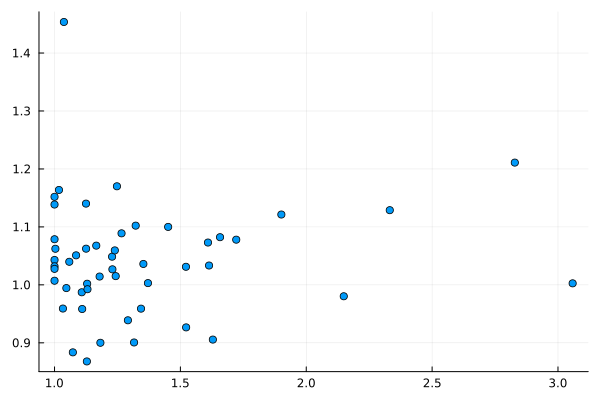

In [3]:
using DelimitedFiles, Plots
N_sample = 50
result_arr = zeros(N_sample,4)
for j in 1:N_sample
    result = readdlm((@__DIR__)*"/results/pigfarm_"*string(j)*".csv", ',')
    result_arr[j,1] = result[6,6] #linrel
    result_arr[j,2] = result[6,5] #spu
    result_arr[j,3] = result[6,2] #t2
    result_arr[j,4] = result[6,1] #t1
end
scatter(result_arr[:,1]./result_arr[:,2], result_arr[:,3], label=false)
scatter!(result_arr[:,1]./result_arr[:,2], result_arr[:,4], label=false)
scatter(result_arr[:,1]./result_arr[:,2], result_arr[:,4]./result_arr[:,3], label=false)